### Linear Regression Part II

In Linear Regression Part I, we did a brief overview of the output of a regression in statsmodels. Now we'll take a more in-depth look at outputs. 

First load our libraries and our data, the [same as from last lesson](https://drive.google.com/open?id=19NgWK34NK5fGCA2eU4rDJ_Fo45nnQIi_):

In [1]:
import numpy as np
import pandas as pd
from statsmodels.regression import linear_model
import statsmodels.api as sm

dfm = pd.read_csv('data/MLR.csv')

In [6]:
dfm.head()

Marketing Budget  Website Visits  Number of Sales
0               0.5             0.5                1
1               0.5             1.3                0
2               0.3             0.2                2
3               0.3             0.7                5
4               0.4             0.6                5

After this we need to add our intercept, and fit the regression:

In [2]:
X = sm.add_constant(dfm[['Marketing Budget', 'Website Visits']].values)
y = dfm['Number of Sales'].values
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     6983.
Date:                Mon, 28 Jan 2019   Prob (F-statistic):          5.05e-180
Time:                        11:36:28   Log-Likelihood:                -610.95
No. Observations:                 195   AIC:                             1228.
Df Residuals:                     192   BIC:                             1238.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0982      0.839      0.117      0.907      -1.557       1.753
x1             3.6367      0.593      6.137      0.000       2.468       4.805
x2             6.5617      0.302     21.701      0.000       5.965       7.158
==============================================================================
Omnibus:                        1.065   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                1.139
Skew:                           0.171   Prob(JB):                        0.566
Kurtosis:                       2.847   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#From the above mdoel, we may want to get rid of the coeff since we arent too sure if its actually zero

#to access coeffis from model, use model.params
beta_0, beta_1, beta_2 = model.params
print(beta_0, beta_1, beta_2)

0.09823378052704296 3.636655497639606 6.561719834098829


In [15]:
#we can use our model to predict new sales on new data for mkt budget and num website visits.
#We pass in list or array of [const., mkt budget, webvisits]. A const of 1 is making sure the beta_0 is 
#included when predicting numsales from 5 mkt budget and 5 numvists

model.predict([1,5,5])
#OR
mkt_bud = 5
web_vis = 5
y_pred = beta_0 + beta_1*mkt_bud + beta_2*web_vis

This table gives us several interesting and more advances statistics about our regression.

Our R squared is a measure of how much of the total variation in our data was explained by our model. In a model with a single independant variable, the $R^2$ is the square of the correlation coeeficient.

In a more complicated model, it is useful to divide out the sources of variability in the data.

The total sum of squares is the sum of the square distance of each dependant data point from the mean:

$$ SS_{total} = \sum\limits_{i=1}^{n}(y_i - \bar{y})^2 $$

The explained sum of squares is the sum of the square differences between predicted and mean y values:

$$ SS_{reg} = \sum\limits_{i=1}^{n}(f_i - \bar{y})^2 $$

The residual sum of squares:

$$ SS_{res} = \sum\limits_{i=1}^{n}(y_i - f_i)^2 $$

From these measures, we can calculate $R^2$:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{total}} $$

### Preventing Overfitting

When creating multiple models we can use some of the statistics included to ensure that we do not overfit the data. 

Adjusted $R^2$ is the $R^2$ above, but it is adjusted for the number of parameters included in the model:

$$ R_{adj}^2 = 1 - \frac{n-1}{df_{resid}}(1-R^2)$$

In our case, the number of observations, n, is large enough that our low number of variables does not seriously impact our R-Squared.



In [ ]:
#we want a model with the highest R squared with the least amount of variables. 
#Adjusted R squared helps with that and will penalize you if you have more variables

### Least Squares Alternatives

We have been running least squares regressions up until now, which simply minimizes the sum of squares of the errors.

Recall, this has a form like the following:

In [16]:
from scipy import stats
import statsmodels.api as sm

# We'll randomly generate some data
x = np.random.normal(size = 100)
y = 3*x + 2 + np.random.normal(scale = 3, size = 100)

# Remember, we have to add in the constant
X = sm.add_constant(x)

# Define our regression, fit our model
my_reg = sm.OLS(y,X).fit()

# Look at the summary
my_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.73
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           8.18e-13
Time:                        12:12:11   Log-Likelihood:                -256.98
No. Observations:                 100   AIC:                             518.0
Df Residuals:                      98   BIC:                             523.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2378      0.319      7.005      0.000       1.604       2.872
x1             2.7449      0.334      8.230      0.000       2.083       3.407
==============================================================================
Omnibus:                        0.974   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                0.933
Skew:                          -0.020   Prob(JB):                        0.627
Kurtosis:                       2.528   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is the base for linear regression, however in recent years, people have been working on finding better alternatives.

We often want to penalize large coefficients, or shrink them to 0, this is another method of reducing overfitting.

In linear regression, we can add this step in by adding to the 'penalty' part of the least squares. Now, we can try to minimize the sum of squares, as well as an extra term.

### L1 and L2 Norms

In technical terms, our cost function for linear regression is the sum of residual squares. When we fit a model we want to minimize the cost function, so that our model fits as closely as possible.

The cost function of linear regression is relatively straightforward and can be minimized with linear algebra. More complicated models have more complicated cost functions, often these cannot be exactly minimized. 

L1 and L2 norms are ways of altering our cost function in linear regression in order to incorporate a penalty for large/non-zero coeefficients. Note: Beta is a vector of all betas. L1 is a penalziation based on the absolute value, where L2 is based on squaring

We can add a term to our cost function, to represent this:

$$ \text{L1: } Cost = \sum\limits_{i=1}^{n}(y_i - \hat{y})^2 + \alpha(|\beta|)$$
$$ \text{L2: } Cost = \sum\limits_{i=1}^{n}(y_i - \hat{y})^2 + \alpha(\beta^2)$$

L2 regularization is when we penalize coefficients by their square, (i.e. the exponent on $\beta$ is 2). L1 regularization is when we penalize the coefficients by their absolute value, (i.e. the exponent on $\beta$ is 1).

L1 is also called Lasso regression. L2 is also called Ridge regression.

L1 will set $\beta$ values to 0 more efficiently than L2, but L2 is normally easier to compute. In general, it would be expected to compute both and compare the model performance.

Ridge and Lasso regression are both implemented in statsmodels as well as in scikit-learn. We can perform these penalized regressions using statsmodels' *fit_regularized* function.

In [17]:
# Because statsmodels is a tough-to-work-with package, there's actually no easy way to pull out the R2 values
# from models after you've fit them. Here we write a function to calculate them for us:
def calc_R2(model, y):
    ss_resid = np.sum((model.fittedvalues - y)**2)
    ss_total = np.sum((y - np.mean(y))**2)
    return round(1 - ss_resid/ss_total, 4)


# Now let's compare the parameters and R2 values for 3 different regressions fit on the same data: plain, L1, and L2

plain_model = sm.OLS(y,X).fit()
print('Plain model results:')
print(plain_model.params)
print(f'R2: {calc_R2(plain_model, y)}')

L1_model = sm.OLS(y,X).fit_regularized(alpha = 1, L1_wt = 1)
print('L1 model results:')
print(L1_model.params)
print(f'R2: {calc_R2(L1_model, y)}')

L2_model = sm.OLS(y,X).fit_regularized(alpha = 1, L1_wt = 0)
print('L2 model results:')
print(L2_model.params)
print(f'R2: {calc_R2(L2_model, y)}')

Plain model results:
[2.23784102 2.7448505 ]
R2: 0.4087
L1 model results:
[1.20658663 1.62346059]
R2: 0.2813
L2 model results:
[1.09874015 1.29673039]
R2: 0.2235


We can see we have worsened our fit, but shrunk our parameters. For a small scale model like this, lasso and ridge are somewhat overkill, but they are useful methods as our data get larger.

### Exercise

Rerun the regression we carried out on the `customer_info.csv`, using regularization. How do the values compare? Do you think this is useful on data this size?



### T-Tests Part II

When we carried out T-tests on jellybeans, we only compared them against a certain value. We also carried out two sample T-tests, where we compared two groups. What if we want to carry out T-tests to figure out if the color of any jelly bean was different from any other?

In this case, we could carry out our original T-tests against each other instead of the mean, but the number of tests would increase exponentially. We had false positive (Type I) errors with 20 comparisons, let alone the problems with 20! comparisions. We could use a multiple testing correction, but the Type II error rate, with 20! Corrections to the critical P-value would likely be very large.

So, what can we do to compare between multiple samples in different categories?

### ANOVA

ANOVA, or 'analysis of variance' is a statistical test where we are interested in comparisons between multiple groups.

In it's simplest form, we are interested in the following question: Are any groups different from the other groups?

$H_0$: The mean of group 1 is equal to the mean of group 2, group 3, .... group n

$H_1$ There is at least one difference between groups

Essentially, we want to know if we have drawn our data from the same distribution, or from a different one.

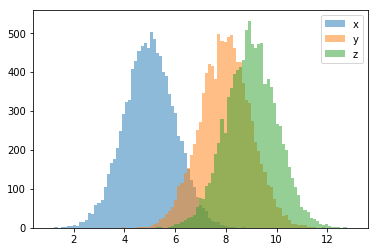

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.normal(loc = 5, scale = 1, size = 10000)
y = np.random.normal(loc = 8, scale = 1, size = 10000)
z = np.random.normal(loc = 9, scale = 1, size = 10000)

bins = np.linspace(1, 13, 100)
plt.hist(x, bins, alpha=0.5, label='x')
plt.hist(y, bins, alpha=0.5, label='y')
plt.hist(z, bins, alpha=0.5, label='z')

plt.legend(loc='upper right');

### Circadian Rhythm Data 

In a famous experiment, [two researchers tried to replicate a finding](http://science.sciencemag.org/content/297/5581/571.full) that shining light into the back of subjects knees decreased jetlag. We have three categories of treatment: light shined into the eyes, light shined into the back of the knees, and a control, no light treatment. The dependent variable is `shift` a measure of the change in circadian rhythm of the subjects.

The data are `jetlag.csv` from [here](https://drive.google.com/file/d/1_q7fc5bZteKOKmvBL2fGwDYOJ00Il9Fm/view?usp=sharing):

In [33]:
jetlag = pd.read_csv('Data/jetlag.csv')
jetlag.head()

treatment  shift
0   control   0.36
1   control   0.53
2   control   0.20
3   control  -0.37
4   control  -0.60

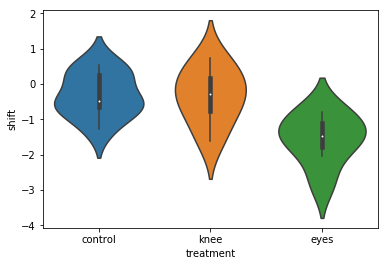

In [34]:
import seaborn as sns
import pandas as pd

sns.violinplot(x = 'treatment', y = 'shift', data = jetlag);

We want to compare the difference between the treatments, to see if they come from the same distribution ie., whether shining a light had an effect in any of the treatments.

The way to do this is to calculate the mean for each group, as well as the overall mean of responses. We want the mean and variance of each group:

In [35]:
agglag = jetlag.groupby('treatment').aggregate({'shift':['mean', 'var', 'count']})
agglag

shift                
               mean       var count
treatment                          
control   -0.308750  0.381384     8
eyes      -1.551429  0.498881     7
knee      -0.335714  0.625395     7

In [17]:
jetlag.var()

shift    0.792373
dtype: float64

Now we want to take the sum of all the variances, times the number of samples - 1:

$$ MS_{error} = \frac{\sum s_i^2(n_i-1)}{N - k}$$

Here we have the Mean Squared error across the groups: 

In [8]:
mserror = np.sum(agglag['shift']['var'] * (agglag['shift']['count'] - 1))/(22-3)
mserror

0.49554445488721804

Now we have a measure of our error mean square. We now want to compare this to the overall error.

$$ MS_{groups} = \frac{\sum n_i (\bar{Y_i} - \bar{Y})^2}{k - 1} $$

In [10]:
avgshift = np.mean(jetlag['shift'])
print(avgshift)
msgroup = np.sum((agglag['shift']['count'] * (agglag['shift']['mean'] - avgshift)**2)/(3-1))
print(msgroup)

-0.7127272727272728
3.6122458603896113


Great, now that we have our mean square for our groups, and our mean square error, we can calculate our F statistic:

$$ F = \frac{MS_{groups}}{MS_{error}} $$

In other words:

$$ F = \frac{variation of means_{between groups}}{variation of means_{within groups}} $$



In [18]:
fstat = msgroup/mserror
fstat

7.289448655442486

The intuition for this test is that if the groups are all the same, then a subgrouping of the data will have the same variance as the total data. In this case, F will be 1. If there is a difference, then the variances will be different, and thus F will be larger than one.

The F-statistic comes from the F-distribution, similar to a t distribution. We need to know the degrees of freedom of the $MS_{groups}$ (number of groups -1) and the $MS_{error}$ (nobs - ngroups).

In [22]:
from scipy import stats

dof_ms_groups = 2
dof_ms_error = 22-3

p_value = 1 - stats.f.cdf(fstat, dof_ms_groups, dof_ms_error)
p_value

0.004472271090001145

How do we intepret the p-value, in relation to our null and alternate hypotheses?

Our P-value is less than the critical value of 0.05 (our model has incorporated the way we carried out the testing, we don't need to worry about the multiple comparisions). 

So, we can reject the null hypothesis that our data is from the same distribution and can say that our data came from different distributions. There is an effect of our treatments. Which treatment in particular? After a small interlude we will discuss what we have actually done. 

Now that we have done it the hard way, is this built in anywhere?

In [36]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

jetlag_lm = ols('shift ~ treatment', data=jetlag).fit()
anova_lm(jetlag_lm)

df    sum_sq   mean_sq         F    PR(>F)
treatment   2.0  7.224492  3.612246  7.289449  0.004472
Residual   19.0  9.415345  0.495544       NaN       NaN

In [37]:
jetlag_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  shift   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     7.289
Date:                Tue, 29 Jan 2019   Prob (F-statistic):            0.00447
Time:                        14:18:09   Log-Likelihood:                -21.881
No. Observations:                  22   AIC:                             49.76
Df Residuals:                      19   BIC:                             53.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3087      0.249     -1.241      0.230      -0.830       0.212
treatment[T.eyes]    -1.2427      0.364     -3.411      0.003      -2.005      -0.480
treatment[T.knee]    -0.0270      0.364     -0.074      0.942      -0.790       0.736
==============================================================================
Omnibus:                        0.945   Durbin-Watson:                   1.204
Prob(Omnibus):                  0.623   Jarque-Bera (JB):                0.919
Skew:                          -0.355   Prob(JB):                        0.632
Kurtosis:                       2.293   Cond. No.                         3.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It turns out that this type of analysis is a special case of linear regression!

We can now interpret the `F-statistic` and `Prob (F-statistic)` in the summary table. It tells us how much better than no model our model is. The coefficients of the model give us the intercept (in this case the mean of the control treatment), and the difference in means between the groups:

shift                
               mean       var count
treatment                          
control   -0.308750  0.381384     8
eyes      -1.551429  0.498881     7
knee      -0.335714  0.625395     7

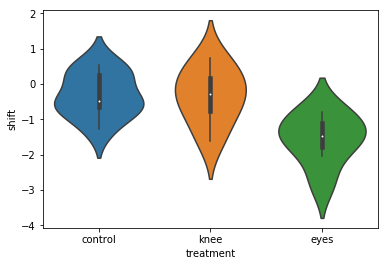

In [38]:
sns.violinplot(x = 'treatment', y = 'shift', data = jetlag);
agglag

### Advanced ANOVA

We have run a one-way, Type I ANOVA. 

ANOVAs can be run on data with interactions. We might have a two way treatment, such as giving the subjects a drug in addition to the light treatment. We can then test for any interaction between drug and light, as well as the individual drug and light effects. This is a two way ANOVA. This is equivalent to a linear model with an interaction term.

Type II and Type III ANOVAs involve random and mixed effects, which we will skip for now. 

### A Priori and Post Hoc Testing

After our ANOVA on jetlag, we know that at least one mean is different from at least one of the others.

We can carry out tests to determine which one is different.

As we discussed, if we have a large number of tests we will eventually get false positives (Type I errors). We saw Brian Wansink had carried out an experiment, then a large number of posthoc tests, effectively p-hacking the answer.

So if we have a planned comparision we are fine running a t-test. If we have other comparisons, we can make them once our ANOVA has shown a significant p-value, but we need to make sure we use a post-hoc correction like the Bonferroni correction.

In our example, were trying to determine whether previous studies showed that shining a light to the back of the knee was as beneficial as shining a light to the eyes. Therefore,I think we are justified in running a T-test:

In [39]:
stats.ttest_ind(jetlag['shift'][jetlag['treatment'] == 'knee'], jetlag['shift'][jetlag['treatment'] == 'eyes'])

Ttest_indResult(statistic=3.033500238074507, pvalue=0.010398726258732876)

We have a significant difference! Additionally, we could probably say we planned the knee vs control. Maybe there was an effect and we didn't care if it was as big as the eye effect. Once we have a larger number of a priori tests we need to calculate a corrected significance value.

In [40]:
stats.ttest_ind(jetlag['shift'][jetlag['treatment'] == 'knee'], jetlag['shift'][jetlag['treatment'] == 'control'])

Ttest_indResult(statistic=-0.07412621710300148, pvalue=0.9420384259725368)

In this case, it doesn't matter, as it is non-significant either way. You might be a little worried now, how can we tell what was preplanned and what wasn't? Are we trusting researchers or not? How does planning something beforehand influence what a p-value means?

One of the most common post-hoc tests is Tukey's Honestly Significant Difference test. This calculates all pairwise comparisions based on data and groups. It also corrects for multiple comparisons:

In [41]:
from statsmodels.stats import multicomp

multicomp.pairwise_tukeyhsd(jetlag['shift'], jetlag['treatment']).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### Exercise

For our jellybean data:

In [42]:
np.random.seed(1234)
from matplotlib import colors

mycolors = np.random.choice(list(colors.CSS4_COLORS.keys()), 40, replace = True)
mydict = {}
np.random.seed(2345)
for i in mycolors:
    if i == 'peachpuff':
        mydict[i] = np.random.normal(loc = 1, scale = 1, size = 30)
    else:
        mydict[i] = np.random.normal(loc = 0, scale = 1, size = 30)

data = pd.DataFrame(mydict)

In [43]:
data.head()

forestgreen  darkturquoise      gray      plum     wheat  darkgoldenrod  \
0    -0.951299      -0.182431  2.202115 -0.109486  0.667898      -1.748654   
1     1.768772       1.636892 -1.518310 -1.715815  0.217430      -2.142039   
2    -1.141827      -0.235464 -2.162442 -0.675781  1.533460       0.764554   
3     0.710755      -1.864630  0.133611  0.152842 -0.118619       0.935855   
4     0.510951       2.784603  0.802777 -0.220339  2.275396      -0.897440   

   darkorange    salmon  darkgrey    purple      ...           pink    orchid  \
0   -1.859181  0.349829 -1.402316  1.250608      ...       2.035900  1.062332   
1    1.005521 -0.946563 -0.968701 -1.576459      ...       1.192312 -0.786073   
2    2.132363 -0.053112  0.474980  0.190921      ...       1.138646  2.625113   
3    2.247562 -0.768636 -0.886693 -1.494557      ...       0.231384 -0.083275   
4    0.830540  1.012924  0.528602 -1.277230      ...      -1.001829 -0.562558   

   chartreuse    indigo  lightyellow  mediumaquamarine  cadetblue  \
0    0.590726 -1.142776    -1.743171          0.354484   0.193544   
1    0.509321  0.195001    -1.035181          0.302980   0.005098   
2   -0.232450  0.484568     0.539180         -0.261170  -0.265615   
3    0.512956  0.840618    -0.448363          0.987353   1.161321   
4   -1.792183 -0.319206    -2.604699         -0.149449  -0.295196   

   midnightblue  peachpuff  mediumorchid  
0      0.046710  -0.562896      1.568013  
1      0.753012   2.460081      0.471475  
2     -1.764482   0.549692      3.024361  
3      0.269758   1.423926      0.188078  
4      0.193344   0.631053      0.946132  

[5 rows x 36 columns]

1. Use `stack` method as well as `reset_index` to get the dataframe into a suitable format for analysis. We want `long` data, with a column for the color, and a column for the response, similar to the jetlag data. Use these methods for help.

In [61]:
#Stacks
data_stack = data.stack()

data_stack_long = pd.DataFrame(data_stack).reset_index() #but this stacks by index into a Series, which we dont want
data_stack_long = data_stack_long.drop(['level_0'], axis = 1) #this gets rid of the series
display(data_stack_long)

level_1         0
0          forestgreen -0.951299
1        darkturquoise -0.182431
2                 gray  2.202115
3                 plum -0.109486
4                wheat  0.667898
5        darkgoldenrod -1.748654
6           darkorange -1.859181
7               salmon  0.349829
8             darkgrey -1.402316
9               purple  1.250608
10                 red  0.611923
11          papayawhip -1.588129
12           lightcyan -0.356026
13      lightsteelblue  1.748580
14            seashell -0.194307
15          ghostwhite  0.209138
16       lightseagreen -0.526208
17       darkslategrey  0.082912
18        darkseagreen -1.682253
19             thistle -0.848648
20              sienna -0.001317
21         lightsalmon -1.267400
22          aquamarine  1.013351
23                aqua  1.656640
24             crimson -0.930425
25              tomato  0.511075
26                pink  2.035900
27              orchid  1.062332
28          chartreuse  0.590726
29              indigo -1.142776
...                ...       ...
1050        darkorange -0.644176
1051            salmon  0.788901
1052          darkgrey  0.457492
1053            purple  0.528853
1054               red -0.192060
1055        papayawhip  0.733578
1056         lightcyan -0.383167
1057    lightsteelblue -1.202799
1058          seashell -1.618316
1059        ghostwhite  0.401078
1060     lightseagreen -0.465003
1061     darkslategrey -1.632631
1062      darkseagreen  0.491848
1063           thistle  0.767268
1064            sienna -0.876651
1065       lightsalmon  0.972343
1066        aquamarine -1.456906
1067              aqua  0.733531
1068           crimson  0.298936
1069            tomato  1.302440
1070              pink  0.885511
1071            orchid -1.141627
1072        chartreuse  1.222053
1073            indigo -0.986519
1074       lightyellow  0.600408
1075  mediumaquamarine -0.017652
1076         cadetblue -1.815910
1077      midnightblue  1.134280
1078         peachpuff -0.103175
1079      mediumorchid  0.810453

[1080 rows x 2 columns]

In [67]:
data_stack_long.columns = ['Colour','Acne']
data_stack_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 2 columns):
Colour    1080 non-null object
Acne      1080 non-null float64
dtypes: float64(1), object(1)
memory usage: 17.0+ KB


In [ ]:
jetlag.head()

2. Carry out an ANOVA on the data, to see if there is a difference between any of the jellybeans effects on acne.
3. Do we have any planned comparisons? What if I told you that peachpuff cured acne? What if it was a published paper? 
4. Run a planned comparison T-test between peachpuff and forestgreen. Can we think of a more sensibly planned comparison?
5. Assume we got a significant value in our ANOVA so we can do a Tukey-HSD on the results. Do we have any significant comparisions?
6. Is this a sensible test setup? Should we be comparing to a control, or to other colors?

In [74]:
#2 ANOVA

jelly_lm = ols('Acne ~ Colour', data=data_stack_long).fit()
anova_lm(jelly_lm)
#we see that we cannot reject, however its pretty close so we continue to investigate


df      sum_sq   mean_sq         F    PR(>F)
Colour      35.0   45.263711  1.293249  1.380399  0.070857
Residual  1044.0  978.088175  0.936866       NaN       NaN

In [ ]:
#3
#Planned comparisons are comaprisons you wanted to look at ahead of time based on suspicions - i.e if you thought crimson was better but wanted to investigate
#No we did not have any planned comaprison.

In [80]:
#4. Run a planned comaprison (T-test)between peachpuff and forestgreen
from scipy import stats

planned_comp = stats.ttest_ind(data_stack_long['Acne'][data_stack_long['Colour']=='peachpuff'],\
                              data_stack_long['Acne'][data_stack_long['Colour']=='forestgreen'])
planned_comp

Ttest_indResult(statistic=2.631969054616263, pvalue=0.010859358854235576)

This indcates that the difference between these two is statistically significant

In [ ]:
aggjelly = data_stack_long.groupby('Colour').aggregate({'Acne':['mean', 'var', 'count']})
aggjelly

In [ ]:
from statsmodels.stats import multicomp



multi_comp = multicomp.pairwise_tukeyhsd(data_stack_long['Acne'], data_stack_long['Colour']).summary()
multi_comp

In [99]:
df2 = pd.DataFrame(data=multi_comp.data[1:], columns=multi_comp.data[0])
df2.head()

group1         group2  meandiff   lower   upper  reject
0   aqua     aquamarine   -0.0189 -0.9808  0.9429   False
1   aqua      cadetblue   -0.1328 -1.0946  0.8291   False
2   aqua     chartreuse    0.0955 -0.8663  1.0573   False
3   aqua        crimson   -0.1176 -1.0794  0.8443   False
4   aqua  darkgoldenrod   -0.3405 -1.3023  0.6214   False

In [100]:
df2[df2['reject']==True]

group1 group2  meandiff  lower   upper  reject
576  peachpuff   plum   -1.0642 -2.026 -0.1023    True